<h2><center>Cognizant - Artificial Intelligence</center></h2>
<h3><center>Task 1 - Exploratory Data Analysis</center></h3>
<center>Exploring customer data to identify next steps</center>
<h4>Problem Statement:</h4>
Gala Groceries is a technology-led grocery store chain based in the USA. They rely heavily on new technologies, such as IoT to give them a competitive edge over other grocery stores. 

They pride themselves on providing the best quality, fresh produce from locally sourced suppliers. However, this comes with many challenges to consistently deliver on this objective year-round.

Gala Groceries approached Cognizant to help them with a supply chain issue. Groceries are highly perishable items. If you overstock, you are wasting money on excessive storage and waste, but if you understock, then you risk losing customers. They want to know how to better stock the items that they sell.

This is a high-level business problem and will require you to dive into the data in order to formulate some questions and recommendations to the client about what else we need in order to answer that question.

Once you’re done with your analysis, we need you to summarize your findings and provide some suggestions as to what else we need in order to fulfill their business problem. Please draft an email containing this information to the Data Science team leader to review before we send it to the client.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read the data
data = pd.read_csv("E:\Forage_Virtual_Internship_Program\Cognizant\Task 1 - Exploratory Data Analysis\sample_sales_data.csv")
data = data.drop(['Unnamed: 0'], axis=1)

In [3]:
# check first 5 records
data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [4]:
# convert timestamp column into a datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [5]:
# extracting year, month, date and hour from timestamp
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month_name()
data['day'] = data['timestamp'].dt.day_name()
data['hour'] = data['timestamp'].dt.hour

data = data.drop(['timestamp'],axis=1)

data.head()

,transaction_id,product_id,category,customer_type,unit_price,quantity,total,payment_type,year,month,day,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2022,March,Wednesday,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,2022,March,Sunday,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,2022,March,Friday,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,2022,March,Wednesday,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,2022,March,Saturday,14


In [6]:
# check dimensions of the data
data.shape

(7829, 12)

In [7]:
# check datatypes present in data
data.dtypes

transaction_id     object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
year                int64
month              object
day                object
hour                int64
dtype: object

In [8]:
# descriptive statistics
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transaction_id,7829,7829,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,7829,300,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,7829,22,fruit,998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_type,7829,5,non-member,1601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit_price,7829.0,NaN,NaN,NaN,7.81948,5.388088,0.19,3.99,7.19,11.19,23.99
quantity,7829.0,NaN,NaN,NaN,2.501597,1.122722,1.0,1.0,3.0,4.0,4.0
total,7829.0,NaN,NaN,NaN,19.709905,17.44668,0.19,6.57,14.97,28.47,95.96
payment_type,7829,4,cash,2027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,7829.0,NaN,NaN,NaN,2022.0,0.0,2022.0,2022.0,2022.0,2022.0,2022.0
month,7829,1,March,7829,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# concise info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   product_id      7829 non-null   object 
 2   category        7829 non-null   object 
 3   customer_type   7829 non-null   object 
 4   unit_price      7829 non-null   float64
 5   quantity        7829 non-null   int64  
 6   total           7829 non-null   float64
 7   payment_type    7829 non-null   object 
 8   year            7829 non-null   int64  
 9   month           7829 non-null   object 
 10  day             7829 non-null   object 
 11  hour            7829 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 734.1+ KB


In [10]:
# check for null/missing values
data.isnull().sum()

transaction_id    0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
year              0
month             0
day               0
hour              0
dtype: int64

In [11]:
# check for duplicates
data.duplicated().sum()

0

In [12]:
data['year'].value_counts()

2022    7829
Name: year, dtype: int64

In [13]:
data['month'].value_counts()

March    7829
Name: month, dtype: int64

As you can see that our data is limited to year - 2022 and month - March. so we will drop year and month column as they are no longer needed for analysis.

In [14]:
# dropping year and month column
data = data.drop(['year', 'month'], axis=1)

In [15]:
cat_columns = data.select_dtypes(include='object').columns
num_columns = data.select_dtypes(exclude='object').columns

print("categorical columns are:\n", cat_columns)
print("*"*75)
print("numerical columns are:\n", num_columns)



categorical columns are:
 Index(['transaction_id', 'product_id', 'category', 'customer_type',
       'payment_type', 'day'],
      dtype='object')
***************************************************************************
numerical columns are:
 Index(['unit_price', 'quantity', 'total', 'hour'], dtype='object')


### Data Visualization (Univariate Analysis)

In [16]:
# different types of categories available in the Gala grocery store
data['category'].value_counts()

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

In [17]:
# different types of customer who are member of the Gala grocery store
data['customer_type'].value_counts()

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64

In [18]:
# different types of payment methods used by customers in the Gala grocery store
data['payment_type'].value_counts()

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

In [60]:
# Most number of transactions day-wise in the Gala grocery store
days_data = data['day'].value_counts().reset_index().rename(columns={'index':'day', 'day':'counts'})
days_data

,day,counts
0,Wednesday,1168
1,Tuesday,1165
2,Sunday,1132
3,Friday,1108
4,Monday,1104
5,Thursday,1078
6,Saturday,1074


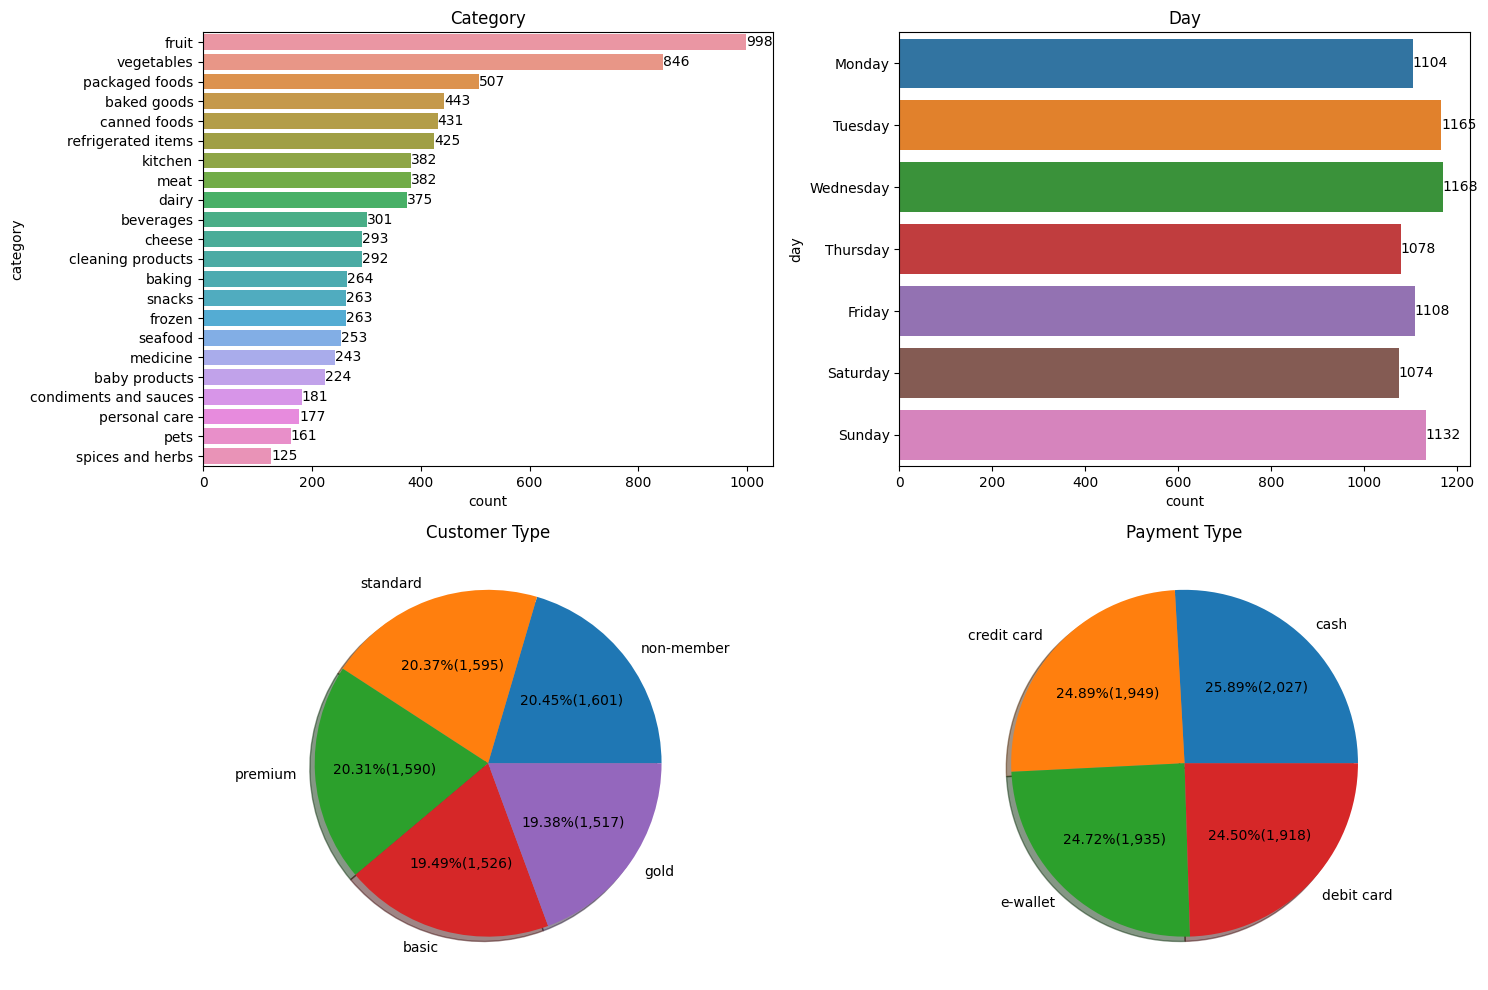

In [66]:
plt.figure(figsize=(15,10))

# category

ax1 = plt.subplot2grid((2,2),(0,0))

sns.countplot(y='category', data=data, ax=ax1, order=data['category'].value_counts().index)
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("Category")

# customer_type

ax2 = plt.subplot2grid((2,2),(1,0))

dataCustomerType = data['customer_type'].value_counts().values
labelsCustomerType = data['customer_type'].value_counts().index

plt.pie(x=dataCustomerType, labels=labelsCustomerType, 
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataCustomerType)/100), shadow=True)
# plt.legend(labelsCustomerType, loc='upper right', title='Customer Type')
plt.title("Customer Type")

# payment_type

ax3 = plt.subplot2grid((2,2),(1,1))

dataPaymentType = data['payment_type'].value_counts().values
labelsPaymentType = data['payment_type'].value_counts().index

plt.pie(x=dataPaymentType, labels=labelsPaymentType, 
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataPaymentType)/100), shadow=True)
# plt.legend(labelsPaymentType, loc='upper right', title='Customer Type')
plt.title("Payment Type")

# day

ax4 = plt.subplot2grid((2,2),(0,1))

sns.countplot(y='day', data=data, ax=ax4, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
for i in ax4.containers:
    ax4.bar_label(i)
plt.title("Day")

plt.tight_layout()
plt.show()

#### Insights:
 - Top 3 product category sold are - fruit, vegetables, packaged fooods.
 - Bottom 3 product category sold are - spices and herbs, pets, personal care.
 - Maximum number of transactions are observed on Tuesday and Wednesday.
 - Lowest number of transactions are observed on Thursday and Saturday.
 - The maximum number transactions are done by customer type - non-member followed by standard, premium, basic, gold.
 - The maximum number of transactions are carried out by payment type - cash followed by credit card, e-wallet, debit card. 

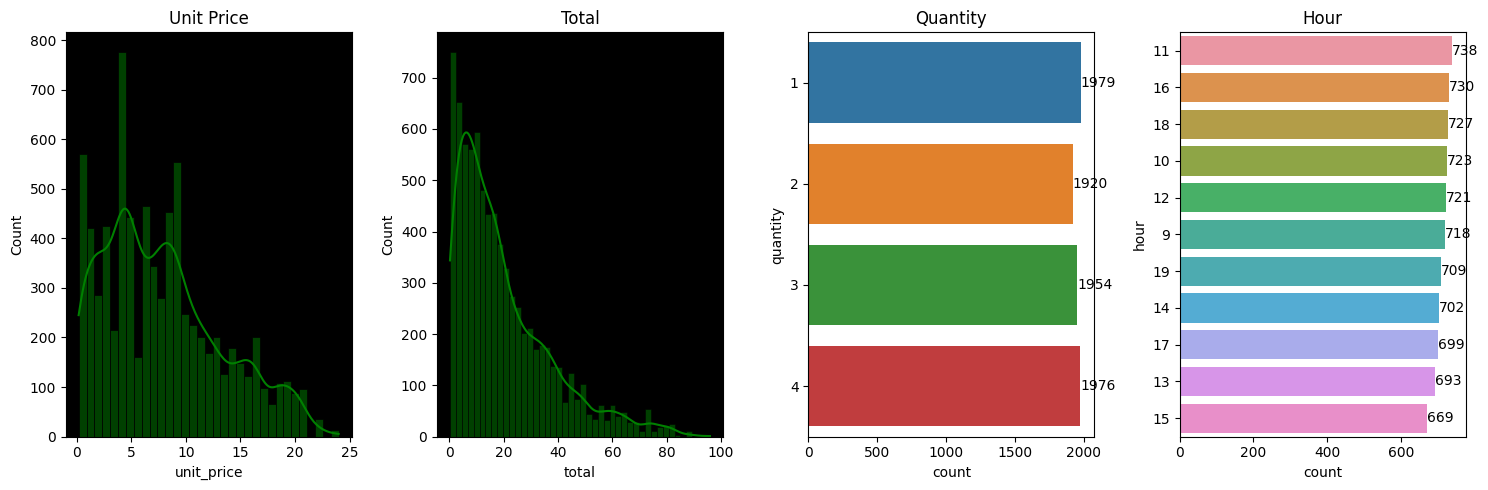

In [68]:
plt.figure(figsize=(15,5))

# unit_price

ax1 = plt.subplot2grid((1,4),(0,0))

sns.histplot(x='unit_price', data=data, kde=True, color='green',ax=ax1)
ax1.set_facecolor('black')
plt.title("Unit Price")

# quantity

ax2 = plt.subplot2grid((1,4),(0,2))

sns.countplot(y='quantity', data=data, ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("Quantity")

# total

ax3 = plt.subplot2grid((1,4),(0,1))

sns.histplot(x='total', data=data, kde=True, color='green',ax=ax3)
ax3.set_facecolor('black')
plt.title("Total")

# hour

ax4 =  plt.subplot2grid((1,4),(0,3))

sns.countplot(y='hour', data=data, ax=ax4, order=data['hour'].value_counts().index)
for i in ax4.containers:
    ax4.bar_label(i)
plt.title("Hour")

plt.tight_layout()
plt.show()

#### Insights:
 - Unit Price is positively skewed that means products with lower unit price are sold more as compared to products with a higher unit price.
 - Total price is also positively skewed as it is the product of unit price and quantity which means customers are making more transactions of products with a lower unit price than the higher unit price.
 - There is no significant difference between the quantity of products that customers are buying as it shows nearly same number of transactions.
 - The maximum number of transactions are observed at 11 a.m., 4 p.m. and 6 p.m. and lowest number of transactions are observed at 3 p.m., 1 p.m., 5 p.m.